In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split

In [186]:
df = pd.read_csv('laptop_pricing_dataset_mod2.csv') 
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [187]:
df =  df.drop(columns= ['Unnamed: 0.1' , 'Unnamed: 0'] ,errors= 'ignore')
features = ['Manufacturer', 'GPU' , 'CPU_core', 'Screen_Size_inch','CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_pounds' , 'Screen-Full_HD' ]

y = df['Price']

x =pd.get_dummies(df[features] , columns= ['Manufacturer', 'GPU'] ,drop_first=True )  

In [188]:
# Split data into training and testing sets (80% train, 20% test)
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2  , random_state=  42)

#    Regression with Pipeline

In [190]:
# Pipeline for simple linear regression  with one feature ()
pipe_simple_linear = Pipeline([
    ('scaler' , StandardScaler()) , 
    ('model' , LinearRegression()) 
    ])


# Pipeline for Multiple Linear Regression
pipe_multi_linear = Pipeline([
    ('scaler',StandardScaler()) , 
    ('model' , LinearRegression()) 
])

# Pipeline for simple polynomial regression degree 3
pipe_simple_poly3 = Pipeline([
    ('scaler' , StandardScaler()) , 
    ('poly', PolynomialFeatures(degree = 3, include_bias= False)) , 
    ('model' , LinearRegression()) 
])

# Pipeline for simple polynomial regression degree 5
pipe_simple_poly5 = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('model', LinearRegression())
])


# Pipeline for multi polynomial regression degree 3
pipe_multi_poly3 = Pipeline([
    ('scaler' , StandardScaler()) , 
    ('poly', PolynomialFeatures(degree = 3, include_bias= False)) , 
    ('model' , LinearRegression()) 
])

In [191]:
# Train the models
pipe_simple_linear.fit(x_train[['CPU_frequency']] , y_train)
pipe_multi_linear.fit(x_train , y_train)

pipe_simple_poly3.fit(x_train[['CPU_frequency']]  , y_train)
pipe_multi_poly3.fit(x_train , y_train)

pipe_simple_poly5.fit(x_train[['CPU_frequency']]  , y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('model', LinearRegression())])

In [192]:
y_hat_simple_linear = pipe_simple_linear.predict(x_test[['CPU_frequency']]  )
y_hat_multi_linear  = pipe_multi_linear.predict(x_test )

y_hat_simple_poly3 = pipe_simple_poly3.predict(x_test[['CPU_frequency']]  )
y_hat_multi_poly3 = pipe_multi_poly3.predict(x_test )

y_hat_simple_poly5 = pipe_simple_poly5.predict(x_test[['CPU_frequency']]  )

In [213]:
def eval_model(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"For {name}  : \n    MSE: {mse:.2f}    ,         R2: {r2:.3f}")

eval_model(y_test, y_hat_simple_linear, "Simple Linear")
eval_model(y_test, y_hat_multi_linear, "Multi Linear")
eval_model(y_test, y_hat_multi_poly3, "simple polynomial deg 3")
eval_model(y_test, y_hat_multi_poly3, "multi valriable Polynomial deg 3")
eval_model(y_test, y_hat_simple_poly5, "simple Poly deg 5")

For Simple Linear  : 
    MSE: 239035.99    ,         R2: -0.037
For Multi Linear  : 
    MSE: 172994.81    ,         R2: 0.249
For simple polynomial deg 3  : 
    MSE: 10877124056.09    ,         R2: -47195.615
For multi valriable Polynomial deg 3  : 
    MSE: 10877124056.09    ,         R2: -47195.615
For simple Poly deg 5  : 
    MSE: 207335.70    ,         R2: 0.100


### Distribution plot for the predicted values and that of the actual values of Single Linear Regression 

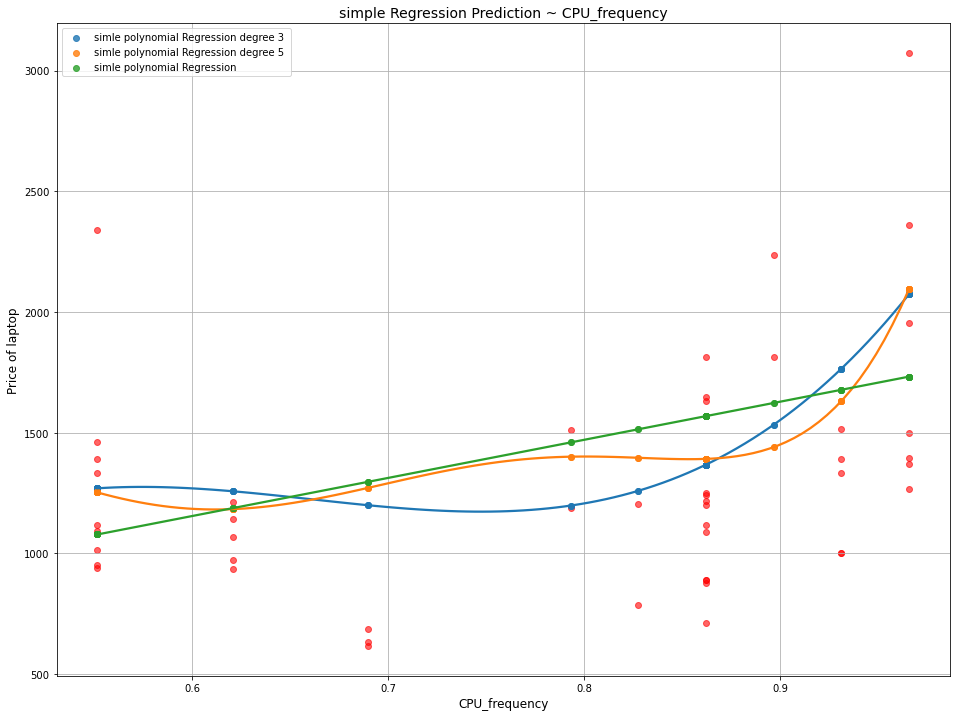

In [214]:
fig , ax    = plt.subplots( figsize=(16,12))
ax.scatter(x_test[ 'CPU_frequency' ] ,y_test  , color= 'r' , alpha=0.6)
ax.set_title("simple Regression Prediction ~ CPU_frequency", fontsize=14)
ax.set_xlabel("CPU Frequency", fontsize=12)
ax.set_ylabel("Price of laptop", fontsize=12)


sns.regplot(x = x_test[ 'CPU_frequency' ] ,y=y_hat_simple_poly3 , order=3 , label='simle polynomial Regression degree 3 ') 
sns.regplot(x = x_test[ 'CPU_frequency' ] ,y=y_hat_simple_poly5 ,   order=5 , label='simle polynomial Regression degree 5')   
sns.regplot(x = x_test[ 'CPU_frequency' ] ,y=y_hat_simple_linear  , order=1 , label='simle polynomial Regression ')   
ax.legend()
ax.grid(True)
plt.show()

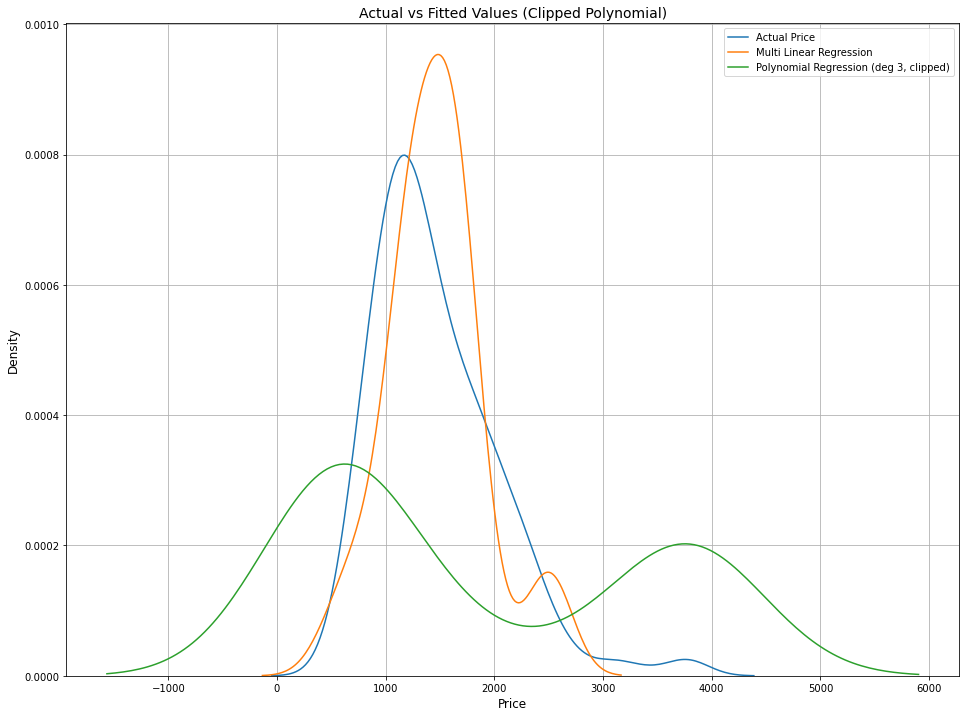

In [215]:
y_hat_poly3_clipped = np.clip(y_hat_multi_poly3, y.min(), y.max())

fig, ax = plt.subplots(figsize=(16,12))

sns.kdeplot(y, label='Actual Price', ax=ax)
sns.kdeplot(y_hat_multi_linear, label='Multi Linear Regression', ax=ax)
sns.kdeplot(y_hat_poly3_clipped, label='Polynomial Regression (deg 3, clipped)', ax=ax)

ax.set_title("Actual vs Fitted Values (Clipped Polynomial)", fontsize=14)
ax.set_xlabel("Price", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend()
ax.grid(True)
plt.show()